In [1]:
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dummy import *

plt.style.use('ggplot')

# Linear methods : Comparison

For each vector (*Difficulty and Ability*) we have two linar methods including or not the notion of attempts.

Here is a summary of the result for the application of those methods

We have 4 different possibilities.


In [2]:
#subs = generate_submissions(users=50, pbls=10)
subs = import_submissions(course_id = "C00199", dbname="test1")
bm = bianary_mat(subs)

In [3]:
def linear1(row, vector):
    '''
    return the level of a row relatively to a vector
    '''
    return  (row[1] * vector).sum() / len(row[1])

def linear2(row, vector):
    '''
    return the level of a row relatively to a vector
    '''
    return 1 - ((row[1] * vector).sum()  / len(row[1]))

def linear3(row, vector):
    '''
    return the level of a row relatively to a vector
    '''
    return  (row[1] * vector).sum() / len(row[1])

def process_bianary_mat(bm, rel_v, f=linear1, name='V', Horiz=False):
    '''
    evaluate the vector from a bm using a method
    and relatively to another vector
    '''
    # evaluate for each row of the binary table
    bmm = bm
    if Horiz:
        bmm=bm.T
    
    vector = [f(row, rel_v) for row in bmm.iterrows()]
    vector = pd.Series(vector, index=bmm.index, 
                             name=name)
    normalize(vector)
    
    return vector

In [4]:
Difficulties = pd.Series([1.0 for i in range(len(bm.index))], index=bm.index, name='Difficulties')
normalize(Difficulties)

In [5]:
Abilities = pd.Series([1.0 for i in range(len(bm.columns))], index=bm.columns, name='Abilities')
normalize(Abilities)

## Difficultied first

In [6]:
#Difficulties = process_bianary_mat(bm, Abilities, name=Difficulties.name)
Difficulties = process_bianary_mat(bm, Abilities,f=linear2 , name=Difficulties.name)
Abilities = process_bianary_mat(bm, Difficulties, name=Abilities.name, Horiz=True)

In [7]:
dfAbl = pd.DataFrame(Abilities)

In [8]:
dfDiff = pd.DataFrame(Difficulties)

## Abilities First

In [9]:
Abilities = pd.Series([1.0 for i in range(len(bm.columns))], index=bm.columns, name='Abilities')
normalize(Abilities)
Difficulties = pd.Series([1.0 for i in range(len(bm.index))], index=bm.index, name='Difficulties')
normalize(Difficulties)
Abilities = process_bianary_mat(bm, Difficulties, name=Abilities.name+"2", Horiz=True)
Difficulties = process_bianary_mat(bm, Abilities,f=linear2 , name=Difficulties.name+"2")

In [10]:
dfAbl[Abilities.name] = Abilities

In [11]:
dfDiff[Difficulties.name] = Difficulties

<IPython.core.display.Javascript object>


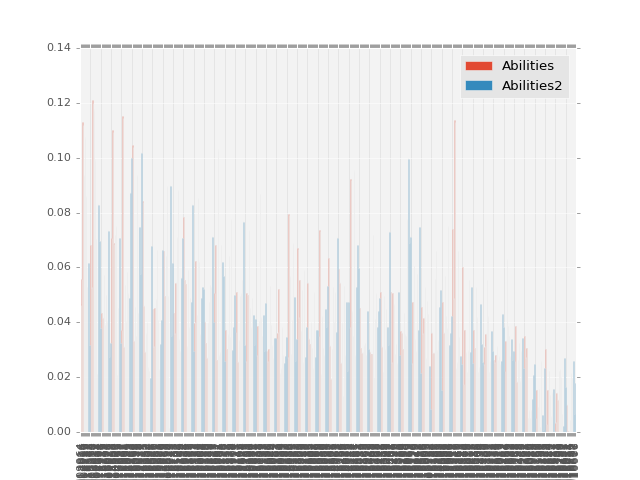

In [12]:
dfAbl.plot(kind='bar')

In [13]:
bmm = bm.as_matrix()
U, s, V = np.linalg.svd(bmm, full_matrices=False)
diff3 = pd.DataFrame(U[:,[0]], index=bm.index, columns=["DifficultiesSVD"])
dfDiff = dfDiff.join(diff3["DifficultiesSVD"]) # * s[0])
abl3 = pd.DataFrame(V[0], index=bm.columns, columns=["AbilitiesSVD"])
dfAbl = dfAbl.join(abl3["AbilitiesSVD"]) # * s[0])

In [14]:
dfDiff.DifficultiesSVD = dfDiff.DifficultiesSVD.apply(lambda x: x * 0.1 + 0.07)
dfAbl.AbilitiesSVD = dfAbl.AbilitiesSVD.apply(lambda x: -x)

<IPython.core.display.Javascript object>


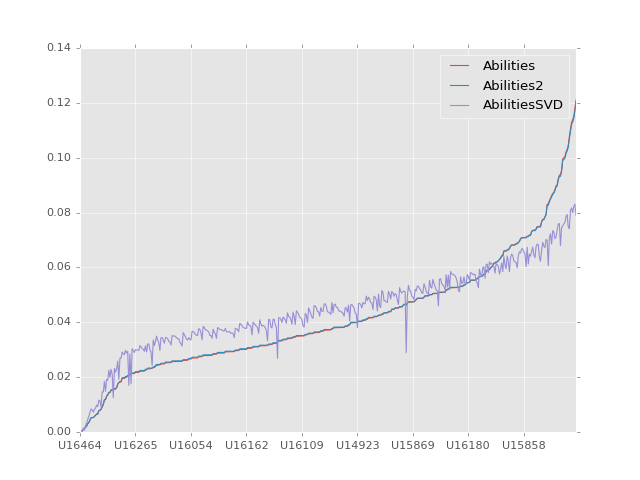

In [17]:
g = dfAbl
g.sort_values(by='Abilities', inplace=True)
g.plot()

<IPython.core.display.Javascript object>


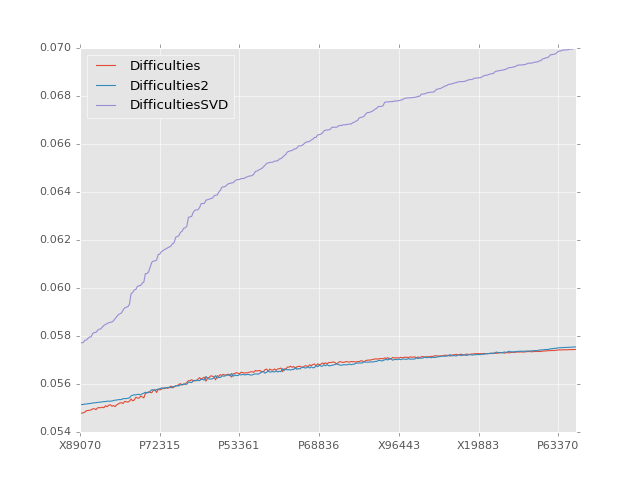

In [16]:
g = dfDiff
g.sort_values(by='DifficultiesSVD', inplace=True)
g.plot()